# Homework 1

- **Authors**: Michal Spano, Dana Ghafour Fatulla
- **Group no.**: `28`
- **Description**: Source code in the form of a `JupyterNotebook` for **Homework 1** of Summer Course `NUMA0` @ **Lund University, Sweden**.

In [1]:
# Imports for the module
import matplotlib.pyplot as plt
from numpy import sqrt, log, linspace, zeros

## Task 1 - Approximating the logarithm

In this task, we create a function that **approximates a logarithm** in $n$ steps based on the following algorithm:

- Having $x > 0$, let $a_0 = \frac{1 + x}{2}, g_0 = \sqrt x$,
- iterate $a_{i + 1} = \frac{a_i + g_i}{2}$ and $g_{i + 1} = \sqrt{a_{i + 1} \ast g_i}$,
- then $\frac{x - 1}{a_i}$ is the approximation of $\ln(x)$.

In [2]:
def approx_ln(x: float, n: int) -> float:
    if x <= 0:
        raise ValueError("x must be greater than 0")
    
    # Initialize the mean values
    a, g = (1 + x) / 2, sqrt(x)
    
    # Iterate in n steps
    for _ in range(n):
        a, g = (a + g) / 2, sqrt(a * g)
    
    # Return the computed approximation
    return (x - 1) / a

## Task 2 - Plotting functions and their difference

In this task, we (i) plot the functions (`log`, `approx_log`) in a single Cartesian coordinate system (ii) and plot the **difference** of both functions given $n = \{1, 2, 5, 10\}$.

*Note*: an established implementation to compute $\ln(x)$ ([`numpy.log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html)) is used here.

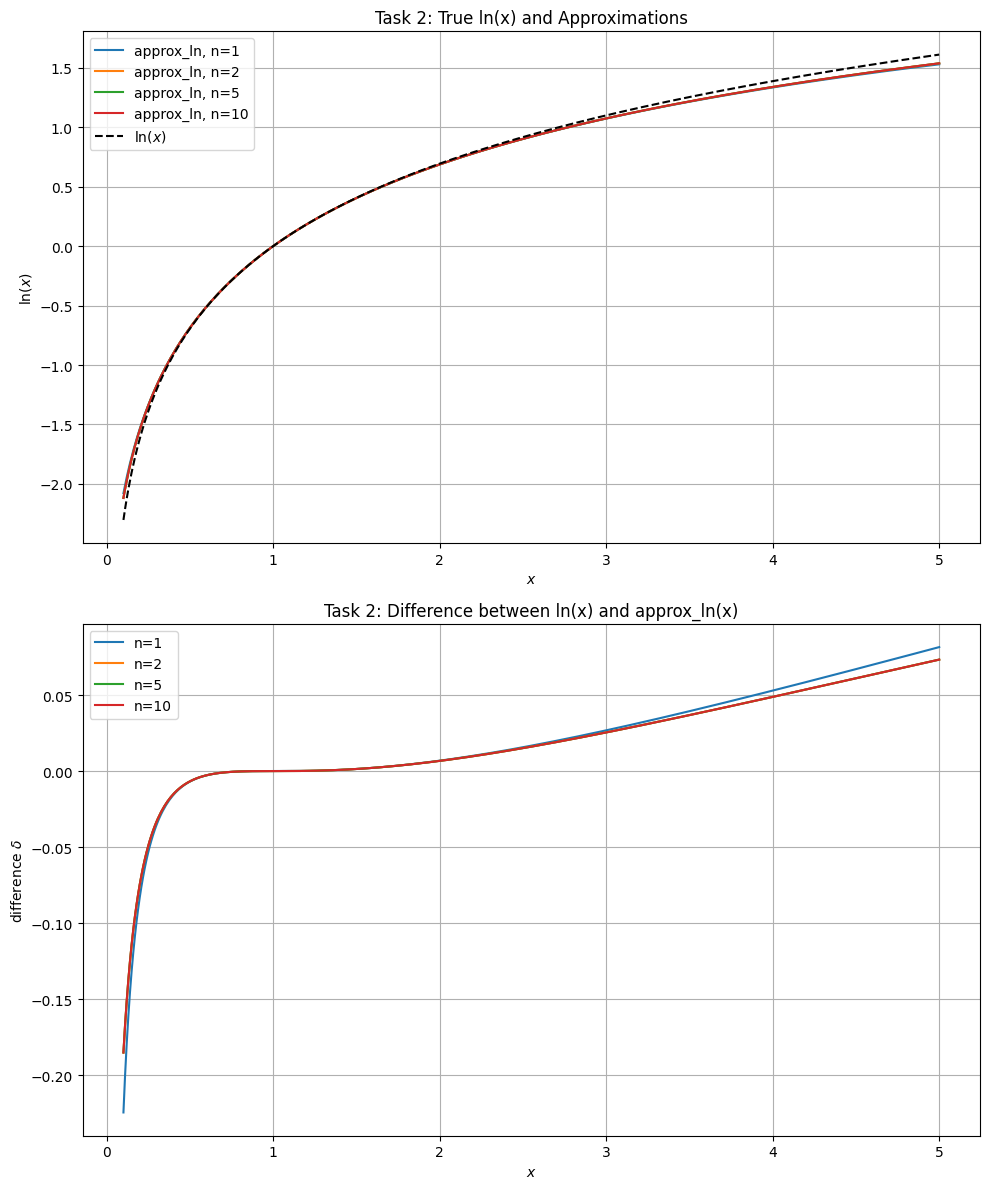

(None, None)

In [3]:
# Generate a range of x values
x_values = linspace(0.1, 5, 500)

# Compute the true ln(x) values
true_ln_values = log(x_values)

# Different values of n for approximation
n_values = [1, 2, 5, 10]

# Create subplots for this task
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Subplot 1: plot ln(x) and approx_ln(x) for different n values
for n in n_values:
    approx_ln_values = [approx_ln(x, n) for x in x_values]
    axes[0].plot(x_values, approx_ln_values, label=f'approx_ln, n={n}')

# Plot actual ln(x) values
axes[0].plot(x_values, true_ln_values, label='$\\ln(x)$', color='black',
             linestyle='--')
axes[0].set_title('Task 2: True ln(x) and Approximations')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$\\ln(x)$')
axes[0].legend()
axes[0].grid(True)

# Subplot 2: plot the difference between ln(x) and approx_ln(x)
for n in n_values:
    approx_ln_y = [approx_ln(x, n) for x in x_values]
    delta_ln    = true_ln_values - approx_ln_y
    axes[1].plot(x_values, delta_ln, label=f'n={n}')

axes[1].set_title('Task 2: Difference between ln(x) and approx_ln(x)')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('difference $\delta$')
axes[1].legend()
axes[1].grid(True)

# Show plots
plt.tight_layout(), plt.show()

# Task 3 - Error given some $x$

In this example, we let $x = 1.41$. We then proceed to plot the absolute value of the error $\delta$ against $n$. We let $n$ be $1, 10, \dots, 100$. This graph is represented with a **dotted line** where the $x$ values represent the individual steps ($n$) and $y$ represent the absolute value of the error.

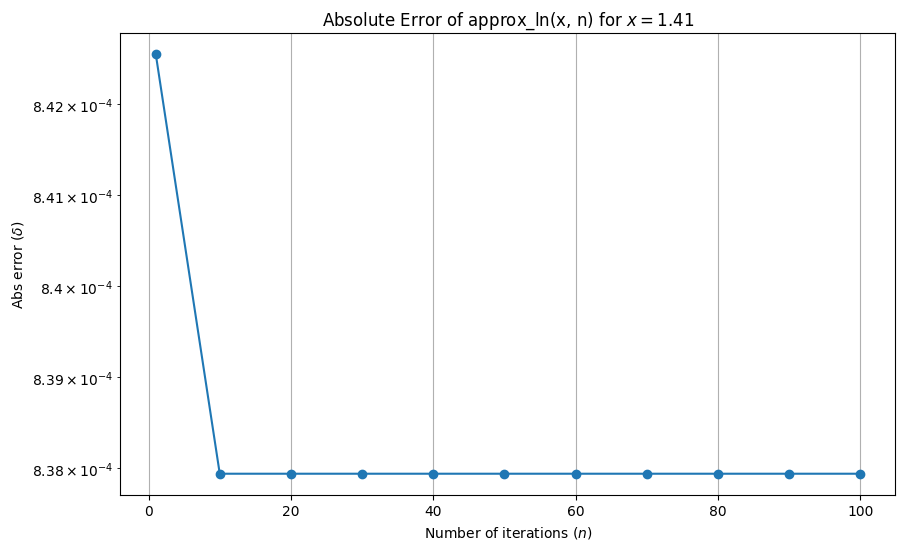

In [4]:
x = 1.41
ns = [1] + [i for i in range(10, 110, 10)] # 1, 10, 20, ..., 100 (n step values)

approx_ln_ys = [approx_ln(x, n) for n in ns]
delta_y      = [abs(y - log(x)) for y in approx_ln_ys]

plt.figure(figsize=(10, 6))
plt.plot(ns, delta_y, "o-") # use a dotted line
plt.yscale("log")
plt.ylabel("Abs error ($\\delta$)")
plt.title(f"Absolute Error of approx_ln(x, n) for $x = {x}$")
plt.xlabel("Number of iterations ($n$)")
plt.grid(True)
plt.show()

# Task 4 - Improving the algorithm

Based on the provided article by *B. C. Carlsson*, the following method is suggested to accelerate the convergence of the previous implementation. In short, it says that

- we iterate $i = 0$ through $n$,
- let $d_{0,i} = a_i$ and continue with
- $d_{k,i} = \frac{d_{k-1, i} -4^{-k} d_{k-1,i-1}}{1-4^{-k}}$, such that $k = 1, \dots, i$ whenever $i > 0$.

Lastly, an approximation of $\ln(x)$ is taken as $\frac{x-1}{d_{n,n}}$. This is an extension of the previously implemented `approx_ln()` method.

In [5]:
def fast_approx_ln(x: float, n: int) -> float:
    if x <= 0:
        raise ValueError("The input value must be greater than 0.")

    # Initial mean values
    a, g = (1 + x) / 2, sqrt(x)
    
    # Initialize '(n+1) x (n+1)' matrix called `d` with zeros
    d = zeros((n + 1, n + 1))
    
    # Iterate in n+1 steps, instantiate d_{0,i}
    for i in range(n + 1):
        d[0, i] = a
        a = (a + g) / 2
        g = sqrt(a * g)
    
    # Compute remaining d_{k,i} s.t. k = 1..i, whenever i > 0.
    for i in range(n + 1):
        for k in range(1, i + 1):
            d[k, i] = (d[k - 1, i] - 4**(-k) * d[k - 1, i-1]) / (1 - 4**(-k))
    
    # An approximation to ln(x) is taken as the following
    return (x - 1) / d[n, n]

# Task 5 - Plotting the improved algorithm

Herein, we replicate the plot provided in the homework using the improved `fast_approx_ln` method.

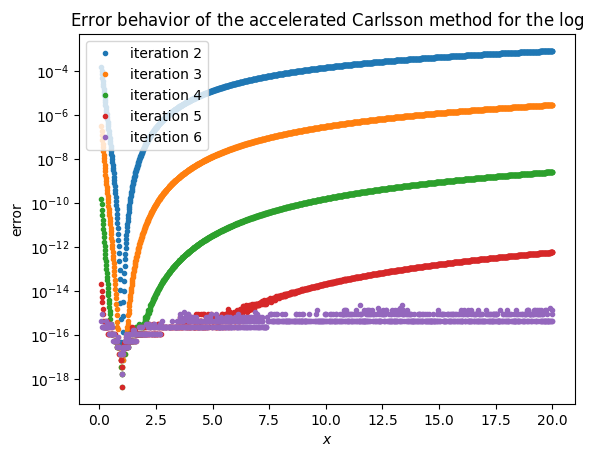

In [6]:
xs = linspace(0.1, 20, 1500) # x = (0,20]

for i in range(2, 7): # iterations 2..6
    fast_approx_ln_ys = [fast_approx_ln(x, i) for x in xs]
    # Compare each iteration against actual log(x)
    delta_y = [abs(y - log(x)) for x, y in zip(xs, fast_approx_ln_ys)]
    plt.plot(xs, delta_y, marker="o", markersize=3, linestyle="None",
             label=f"iteration {i}")

plt.title("Error behavior of the accelerated Carlsson method for the $\\log$")
plt.yscale("log") # logarithmic scale for y-axis
plt.xlabel("$x$")
plt.ylabel("error")
plt.legend()
plt.show()